## Ensembles of Decision Trees

*Ensembles* are methods that combines multiple machine learning models to create more powerful models. There are several machine learning models that belong to this category, but there are two ensemble models that have proven to be effeictive on a wide range of datasets for classification and regression. Both of them use decision trees as their building blocks: **Random forest** and **Gradient boosted** decision trees.

### Random forests

As mentioned before, a main drawback of decision trees is that they tend to overfit the training data. Random forests are one way to address this problem which is a collection of decision trees where each tree is slightly different from each others. 
The idea behind random forests is the each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. 
Random forests get their name from injecting randomness into the tree building to ensure each tree is different. There are two ways in which the tree in a random forests are randomized: 
- By selecting the data points used to build a tree 
- By selecting the features in each split test. 


#### Building random forests:

For building a random forest model, we need to decide on the number of trees to build (the *n_estimators* parameter of *RandomForestRegressor* or *RandomForestClassifier*). If we want to make 10 trees, these trees will be built compeletly independently from each othe, and the algorithm will make different random choices for each tree to make sure the trees are distinct. To build a tree, we first take what is called a *bootstrap sample* of our data. That is, from our *n_samples* data points, we repeatedly draw an sample randomly with replacement (meaning the same sample can be picked multiple times), *n_samples* times. THis will create a dataset that is as big as the original dataset, but some data points will be missing from it(approximately one third), and some will be repeated. 

Now, I am applying a random forest consisting of five trees to the *two_moons* dataset shown earlier.

In [2]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [4]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                   random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

The trees that are built as part of the random forest are stored in the *estimator_* attribute. Let's visualize the decision boundaries learned by each tree, together with their aggregate prediction as made by the forest. 

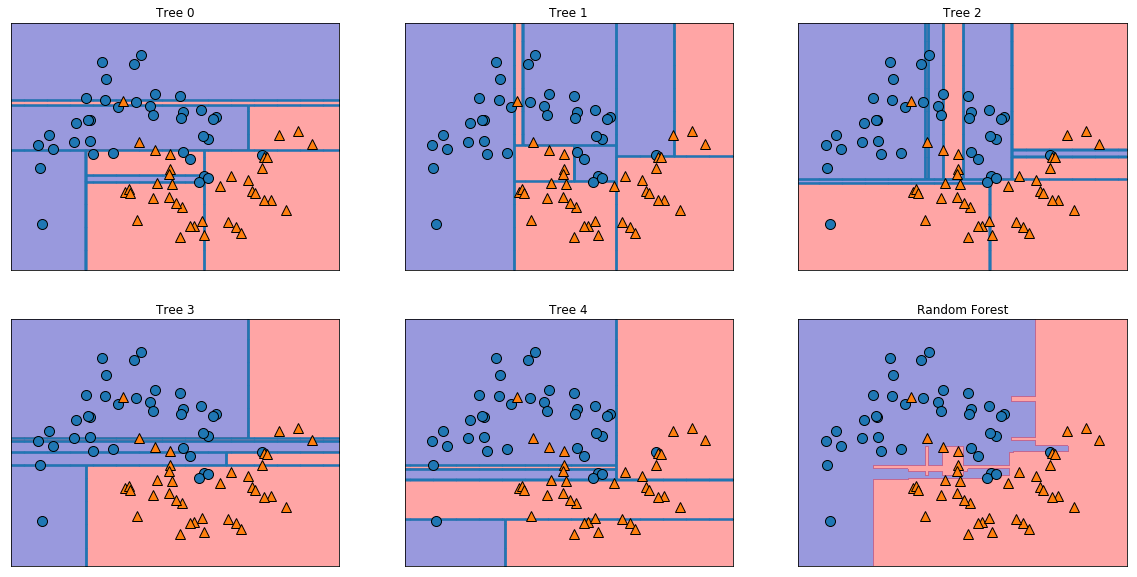

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


Figures above show the decision boundaries found by five randomized decision trees and the decision boundary obtained by averaging their predicted probabilities. 

#### Another exampl

Let's apply a random forest consisting of 100 trees on the Breast Cancer dataset. 

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set is: {:.3F}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set is: {:.3F}'.format(forest.score(X_test, y_test)))

Accuracy on training set is: 1.000
Accuracy on test set is: 0.972


In [9]:
for n in [1, 10, 100, 1000]:
    forest = RandomForestClassifier(n_estimators=n, random_state=0)
    forest.fit(X_train, y_train)
    print('Accuracy on training set is: {:.3F}'.format(forest.score(X_train, y_train)))
    print('Accuracy on test set is: {:.3F}'.format(forest.score(X_test, y_test)))

Accuracy on training set is: 0.960
Accuracy on test set is: 0.881
Accuracy on training set is: 1.000
Accuracy on test set is: 0.951
Accuracy on training set is: 1.000
Accuracy on test set is: 0.972
Accuracy on training set is: 1.000
Accuracy on test set is: 0.972


In [16]:
for max_feature in [1, 10]:
    forest = RandomForestClassifier(n_estimators=100, max_features=max_feature, random_state=0)
    forest.fit(X_train, y_train)
    print('Accuracy on training set is: {:.3F}'.format(forest.score(X_train, y_train)))
    print('Accuracy on test set is: {:.3F}'.format(forest.score(X_test, y_test)))

Accuracy on training set is: 1.000
Accuracy on test set is: 0.958
Accuracy on training set is: 1.000
Accuracy on test set is: 0.972


In [17]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set is: {:.3F}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set is: {:.3F}'.format(forest.score(X_test, y_test)))

Accuracy on training set is: 1.000
Accuracy on test set is: 0.972


In [22]:
cancer.data.shape # number of rows and feature in the cancer dataset 

(569, 30)

#### How to deal with feature importance in Random Forest?

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    
    """Plot horizental bars for feature importance 
       for the selected model"""
    Fig = plt.figure(figsize=(10,10))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

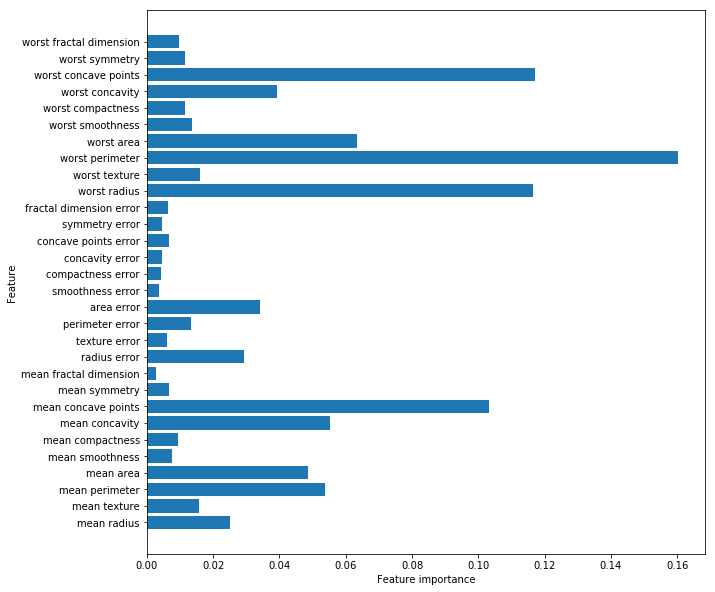

In [34]:
plot_feature_importances_cancer(forest)